In [ ]:
#1.	This cell imports the data and important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
data=pd.read_excel('Transfer_MSU.xlsx')
data1=pd.read_excel('Transfer_MSU1.xlsx')

In [2]:
#2.	This cell creates a function that takes in two columns from a dataframe that have 
#either Yes or No as answers and compares them and makes a graph
def Function2_Yes_Yes(column_compare_number1,column_compare_number2,
                                           The_label_of_column1="what you actually want to see1", 
                          The_label_of_column2="what you actually want to see2"):
    
    column_compare_number1_list= []
    for row in data.values[:,column_compare_number1]:
        column_compare_number1_list.append(row)
    column_compare_number2_list = []
    for row in data.values[:,column_compare_number2]:
        column_compare_number2_list.append(row)
    yes=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Y" and j == "Y":
            yes+=1
    yes1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "N" and j == "Y":
            yes1+=1
    no=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "Y" and j == "N":
            no+=1
    no1=0
    for i,j in zip(column_compare_number2_list, column_compare_number1_list):
        if i == "N" and j == "N":
            no1+=1
    Percent_1 = yes/(yes+no) 
    Percent_2 = yes1/(yes1+no1) 
    Percent_3 = no/(yes+no) 
    Percent_4 = no1/(yes1+no1) 
    print(yes,"Did "+str(The_label_of_column1),"and did "+str(The_label_of_column2),Percent_1)
    print(yes1,"Did "+str(The_label_of_column1),"and did not "+str(The_label_of_column2),Percent_2)
    print(no,"Did not "+str(The_label_of_column1),"and did "+str(The_label_of_column2),Percent_3)
    print(no1,"Did not "+str(The_label_of_column1),"and did not "+str(The_label_of_column2),Percent_4)
    x=[1,2] 
    y=[Percent_1,Percent_3] 
    y1=[Percent_2,Percent_4]
    
    fig = plt.figure(figsize=(8,6))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(20,10))
    ax1.bar(x,y1,width=.25)
    ax2.bar(x,y,width=.25)
    ax1.set_title('No '+str(The_label_of_column2))
    ax2.set_title('Yes '+str(The_label_of_column2))
    ax1.set( ylabel='Percent')
    ax1.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    ax2.set(xticklabels=['','Yes '+str(The_label_of_column1),'','','','','No '+str(The_label_of_column1)])
    sns.set(font_scale=2)
    plt.tight_layout()
    plt.show()

1474 Did Transfer and did Graduate within Natsci 0.2443633952254642
853 Did Transfer and did not Graduate within Natsci 0.18332258757790673
4558 Did not Transfer and did Graduate within Natsci 0.7556366047745358
3800 Did not Transfer and did not Graduate within Natsci 0.8166774124220932


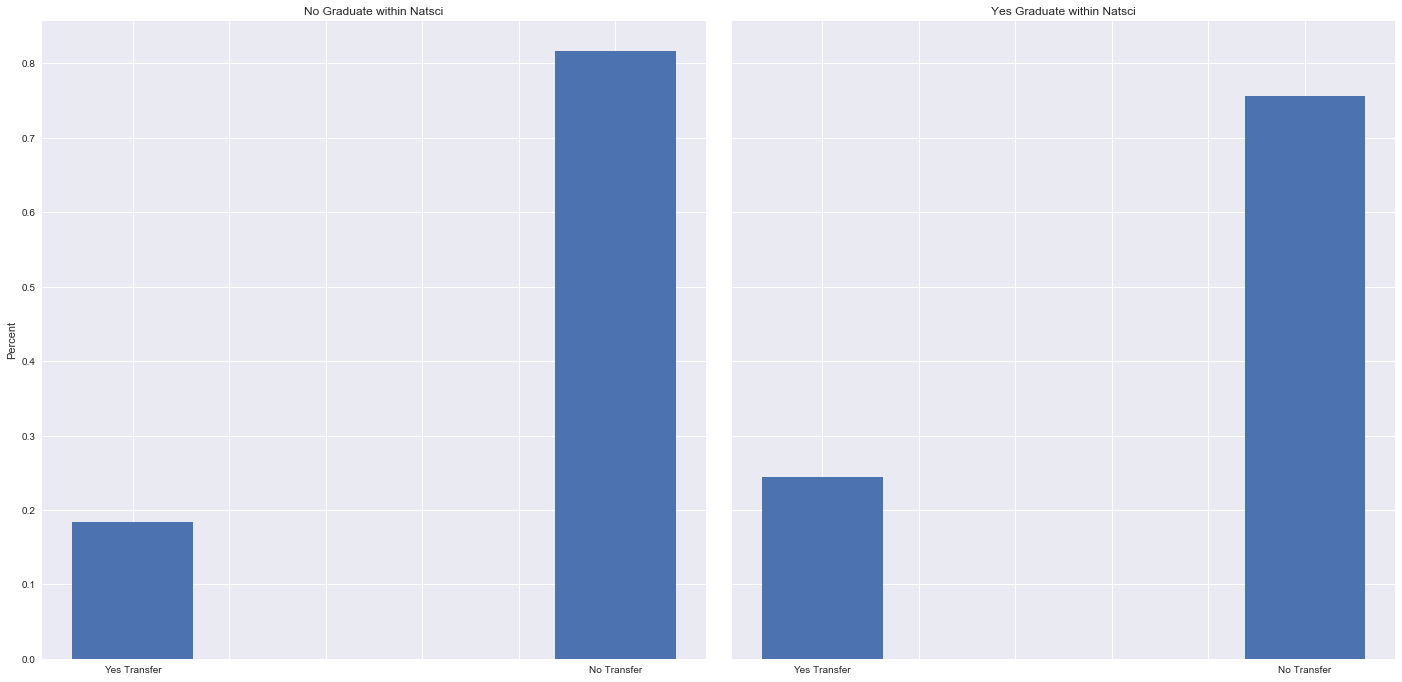

In [3]:
#3.	This cell calls the previous function
Function2_Yes_Yes(2,7,"Transfer","Graduate within Natsci")

In [4]:
#4.	This cell calculates how many students received a degree in physics.
major= []
for row in data1.values[:,2]:
    major.append(row)
degree_conferred = []
for row in data1.values[:,8]:
    degree_conferred.append(row)
total_students=len(major)

grad_physics=0    
for i,j in zip(major,degree_conferred):
    if i=="Physics" and j=="Y":
        grad_physics+=1
print(grad_physics,"students out of ",total_students, "recieved a degree within the major of physics")
#this is about 25 percent of all the physics majors.
    

214 students out of  35358 recieved a degree within the major of physics


In [5]:
#5.	This cell makes a list of ID’s of transfer students.
ID_grad_phys=[]
count=0
for i,j in zip(major,degree_conferred):
    if i=="Physics" and j=="Y":
        ID_grad_phys.append(data1.values[count,0])
        count+=1
    else:
        count+=1

transfer=[]
for row in data.values[:,2]:
    transfer.append(row)
count=0

ID_transfer=[]
for i in transfer:
    if i=="Y":
        ID_transfer.append(data.values[count,0])
        count+=1
    else:
        count+=1


In [6]:
#6.	This cell calculates how many people transferred and graduated with a physics degree.
transfer_phys_grad=0
for i in ID_transfer:
    for j in ID_grad_phys:
        if i==j:
            transfer_phys_grad+=1
print(transfer_phys_grad, "people transferred and graduated in physics")
total1=16908
P1=transfer_phys_grad/total1
print("this is ",P1,"percent")

58 people transferred and graduated in physics
this is  0.003430328838419683 percent


In [7]:
#7.	This cell calculates stuff with the human bio major
ID_grad_HB=[]
count=0
for i,j in zip(major,degree_conferred):
    if i=="Human Biology" and j=="Y":
        ID_grad_HB.append(data1.values[count,0])
        count+=1
    else:
        count+=1

transfer=[]
for row in data.values[:,2]:
    transfer.append(row)
count=0

# ID_transfer=[]
# for i in transfer:
#     if i=="Y":
#         ID_transfer.append(data.values[count,0])
#         count+=1
#     else:
#         count+=1


In [8]:
#8.	This cell calculates how many people transferred and graduated with a HB degree.
transfer_HB_grad=0
for i in ID_transfer:
    for j in ID_grad_HB:
        if i==j:
            transfer_HB_grad+=1
print(transfer_HB_grad, "people transferred and graduated in human biology")
total1=16908
P2=transfer_HB_grad/total1
print("this is ",P2,"percent")

374 people transferred and graduated in human biology
this is  0.022119706647740715 percent


In [9]:
#9.	This cell calculates the fraction of transfers who started in natsci but graduated outside of natsci.
yes_transfer=0
for i in transfer:
    if i=="Y":
        yes_transfer+=1
init_natsci=[]
for row in data.values[:,4]:
    init_natsci.append(row)
grad_natsci=[]
for row in data.values[:,7]:
    grad_natsci.append(row)
transfer_no_grad_in_natsci=0
for i,j,k in zip(transfer,init_natsci,grad_natsci):
    if i=="Y" and j=="Y" and k=="N":
        transfer_no_grad_in_natsci+=1
print(transfer_no_grad_in_natsci/yes_transfer, "ratio is this thingy")

0.22207758396250976 ratio is this thingy


In [52]:
#10.	This cell has a list of majors in categories.
stem_majors=[' Animal Husbandry ', ' Integrative Biology ', ' Geology ', ' Envir & Natural Res Policy Std ', ' Physics and Geophysics ',' Chemical Physics ',' Geophysics ',' Accounting ',' Actuarial Science ',' Agr & Nat Res   No Preference',' Ag,Food & Natural Resources Ed ',' Agri Business',' Agribusiness Management ',' Agric & Natural Resources Comm ',' Agricultural Industries ',' Agricultural Operations ',' Agriscience ',' Animal Science ',' Anthropology ',' Applied Mathematics ',' Applied Plant Science ',' Applied Statistics ',' Audiology and Speech Sciences ',' Beef Cattle Management ',' Biochem&Molecular Biol/Biotech ',' Biochemistry ',' Biochemistry & Molecular Biol ',' Biochemistry/Biotechnology ',' Biological Science ',' Biological Science Interdept',' Biology ',' Biomedical Laboratory Science ',' Botany ',' Botany and Plant Pathology ',' Building Construction Mgt ',' Cell and Molecular Biology ',' Chemistry ',' Clinical Laboratory Sciences ',' Communication ',' Communicative Sci & Disorders ',' Computational Chemistry ',' Computational Mathematics ',' Computer Science ',' Crop and Soil Sciences ',' Diagnostic Molecular Science ',' Dietetics ',' Earth Science Interdept',' Earth Science ',' Economic Geography ',' Electrical Technology ',' Entomology ',' Envir Biol/Botany & Plant Path ',' Envir Biology/Microbiology ',' Envir Biology/Plant Biology ',' Envir Studies & Sustainability ' ,' Envir Studies and Agriscience ',' Environ Biology/Microbiology ',' Environ Studies & Applications ',' Environmental Biol/Plant Biol ',' Environmental Biology/Botany ',' Environmental Biology/Zoology ',' Environmental Economics & Mgt ',' Environmental Economics&Policy ',' Environmental Geography ',' Environmental Geosciences ',' Environmental Sci & Mgt ',' Environmental Soil Science ',' Epidemiology ',' Finance ',' Fisheries and Wildlife ',' Food Science ',' Forensic Science ',' Forestry ',' Fruit & Vegetable Crop Mgt ',' General Science ',' General Science Interdept',' Genomics & Molecular Genetics ',' Geographic Information Science ',' Geography ',' Geological Sciences ',' Global & Area Studies Soc Sci',' Global & Intl Stdys in Soc Sci ',' Graphic Design ',' Horticulture ',' Human Biology ',' Human Geography ',' Human Medicine ',' Industrial Mathematics ',' Integrative Pharmacology ',' Intr Stdy S S Public Plcy Stdy',' Intr Stdy Soc Sci Cmty Rel',' Intr Stdy Soc Sci Envir Policy',' Intr Stdy Soc Sci Health Stdy',' Intr Stdy Soc Sci Hm Res Scty',' Intr Stdy Soc Sci Human Aging',' Intr Stdy Soc Sci Intl Studies',' Intr Stdy Soc Sci Law&Society',' Intr Stdys Soc Sci: Soc Sci Ed ',' Intr Studies in Social Science ',' Kinesiology ',' LBS Animal Science ',' Mathematics ',' Mathematics, Advanced ',' Media Arts and Technology ',' Media and Communication Tech ',' Microbiol & Molecular Genetics ',' Microbiology ',' Natural Res Recreation & Tour ',' Natural Science No Preference',' Neuroscience ',' Nursing ',' Nutritional Sciences ',' Organic Farming ',' Osteopathic Medicine ',' Pharmacology & Toxicology ',' Physical Science ',' Physical Science Interdept',' Physics and Geophysics ',' Physiology ',' Plant Biology ',' Plant Breeding & Genetics CSS',' Plant Pathology ',' Predental ',' Premedical ',' Prenursing ',' Preoptometry ',' Preveterinary ',' Psychology ',' Public Health ',' School Psychology ',' Science & Technology Studies ',' Statistics ',' Swine Management ',' Technology Systems Management ',' Telecommunication ',' Urban and Regional Planning ',' Veterinary Medicine ',' Veterinary Technology ',' Viticulture ',' Zoology ']

nonstem_majors=[' Public Administration ', ' Criminalistics ',  ' Personnel Administration ', ' Park and Recreation Resources ', ' Financial Administration ', ' Home Economics ', ' Social Science Law, Democracy', ' Food: Technology & Management ', ' Applied Music ', ' Apparel Design and Textiles ', ' Music   No Major', ' Social Science ',' Social Science Prelaw', ' Hotel & Restaurant Management ', ' Art Practice ', ' Humanities ', ' MLM Logistics', ' Advertising ',' African American & African Std ',' American Studies ',' Ancient Studies ',' Apparel and Textile Design ',' Apparel and Textiles ',' Arabic ',' Art History and Visual Culture ',' Arts & Letters   General',' Arts and Humanities ',' Athletic Training ',' Business Analytics ',' Business Preference',' Business Administration ',' Business Admitted',' Child Development ',' Chinese ',' Classical Studies ',' Clinical Social Work ',' Commercial Floriculture ',' Community Sustainability ',' Comparative Culture & Politics ' ,' Composition ',' Composition and Music Theory ',' Construction Management ',' Criminal Justice ',' Dairy Management ',' Dairy Production ',' East Asian Languages & Culture ',' Economics ',' English ',' English Language Center ',' Experience Architecture ',' Family & Consumer Resources ',' Family Community Services ',' Family and Consumer Sciences ',' Film Studies ',' Food Industry Management ',' French ',' General Business Admin ',' General Business Admin Prelaw',' General Management ',' German ',' Global Stdys Arts & Humanities ',' Hist,Philosophy & Soc of Sci ',' History ',' History of Art ',' Horse Management ',' Hospitality Business ',' Human Devel and Family Studies ',' Human Devl and Family Studies ',' Human Resource Management ',' Human Resources and Labor Rel ',' Humanities Prelaw',' Interdisciplinary Humanities ',' Interior Design ',' Interior Design&Facilities Mgt ',' International Relations ',' James Madison ',' Japanese ',' Jazz Studies ',' Journalism ',' Landscape Architecture ',' Landscape Management ',' Landscape and Lawn Management ',' Landscape and Nursery ',' Landscape and Nursery Mgt ',' Language Program ',' Latin ',' Law ',' Linguistics ',' Livestock Industries ',' Management ',' Management,Strategy,Leadership ',' Manufacturing Engineering ',' Marketing ',' Media and Information ',' Medical Technology ',' Merchandising Management ',' Music ',' Music Education ',' Music Performance ',' Music Therapy ',' Park, Recreation & Tourism Res ',' Philosophy ',' Pol Theory&Constitutional Dem ',' Policy and Applied Economics ',' Political Economy ',' Political Science ',' Political Science Prelaw',' Professional Writing ',' Public Admin and Public Policy ',' Public Affairs Management ',' Public Policy ',' Public Resource Management ',' Religious Studies ',' Residential Coll in Arts & Hum ',' Resource Development ',' Retailing ',' Russian ',' School Music   No Major',' Social Relations ',' Social Relations and Policy ',' Social Work ',' Sociology ',' Spanish ',' Special E Emotional Impairment',' Sports and Commercial Turf Mgt ',' Studio Art ',' Supply Chain Management ',' Sustainable Parks,Rec and Tour ',' Teaching Cert Internship Year ',' Telecomm, Info Studies & Media ',' Theatre ',' Turfgrass Management ',' Turfgrass Management Golf'," Women's Studies "," Women's and Gender Studies ",' World Politics ']

Engineering=[' Agricultural Engineering Tech ', ' Agricultural Engineering ', ' Mechanics ', ' Applied Engineering Sciences ',' Biosystems Engineering ',' Chemical Engineering ',' Civil Engineering ',' Computer Engineering ',' Electrical Engineering ',' Engineering   No Preference',' Engineering Arts ',' Engineering Mechanics ',' Environmental Engineering ',' Materials Sci and Engineering ',' Mechanical Engineering ',' Packaging ']

phy_ast=[' Physics ',' Astrophysics ',' Astrophysics and Astronomy ']

education=[' Recreation and Youth Leadershp ', ' Physical Education ', ' Early Care and Education ',' Art Education ',' Curriculum and Teaching ',' Education ',' Elementary Education ',' History Education ',' Instrumental Music Education ',' Lifelong Education ',' Mathematics Education ',' Music Education ',' Phys Ed & Exercise Science ',' Special E Emotional Impairment',' Special Ed Deaf Education',' Special Ed Learn Disabilities',' Special Ed Visual Impairment',' Stringed Instrument Music Ed ',' Teaching and Curriculum ',' Vocal General Music Education']

other=[' High School Guest ',' Law Non Degree Guest',' Transient Major ']

no_preference=[' No Preference ']

lbs=[' LBS No Coordinate Major', ' LBS Medical Technology', ' LBS Human Biology ', ' LBS Astrophysics ',' LBS Animal Science ',' LBS Biochem and Molecular Biol ',' LBS Biochemistry ',' LBS Biochemistry/Biotechnology ',' LBS Biological Science ',' LBS Biology Field of Concent',' LBS Botany and Plant Pathology ',' LBS Chemical Physics ',' LBS Chemistry ',' LBS Computational Chemistry ',' LBS Computational Mathematics ',' LBS Computer Science ',' LBS Computer Science FC',' LBS Earth Science FC',' LBS Earth Science Interdept',' LBS Entomology ',' LBS Envir Biology/Plant Biol ',' LBS Envir Biology/Zoology ',' LBS Envir/Bio/Botany & Plant P ',' LBS Envir/Biology/Microbiology ',' LBS Environ Sci and Management ',' LBS Environmental Geosciences ',' LBS General Science Interdept',' LBS Genomics & Molecular Genet ',' LBS Geological Sciences ',' LBS Geological Sciences ',' LBS Mathematics ',' LBS Medical Technology ',' LBS Microbiology ',' LBS Nutritional Sciences ',' LBS Physical Science FC',' LBS Physical Science Interdept',' LBS Physics ',' LBS Physics and Geophysics ',' LBS Physiology ',' LBS Plant Biology ',' LBS Science & Tech Studies FC',' LBS Statistics ',' LBS Zoology ',' Lyman Briggs ',' Lyman Briggs School ']

In [11]:
#11.	This cell appends all those lists into one list
all_majors1=[]
for i in stem_majors:
    all_majors1.append(i)
for i in nonstem_majors:
    all_majors1.append(i)
for i in Engineering:
    all_majors1.append(i)
for i in phy_ast:
    all_majors1.append(i)
for i in education:
    all_majors1.append(i)
for i in other:
    all_majors1.append(i)
for i in no_preference:
    all_majors1.append(i)
for i in lbs:
    all_majors1.append(i)

In [12]:
#12.	This cell manipulates the list so that we can use it.
all_majors=[]
for i in all_majors1:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    all_majors.append(i)
all_majors

['Animal Husbandry',
 'Integrative Biology',
 'Geology',
 'Envir & Natural Res Policy Std',
 'Physics and Geophysics',
 'Chemical Physics',
 'Geophysics',
 'Accounting',
 'Actuarial Science',
 'Agr & Nat Res   No Preferenc',
 'Ag,Food & Natural Resources Ed',
 'Agri Busines',
 'Agribusiness Management',
 'Agric & Natural Resources Comm',
 'Agricultural Industries',
 'Agricultural Operations',
 'Agriscience',
 'Animal Science',
 'Anthropology',
 'Applied Mathematics',
 'Applied Plant Science',
 'Applied Statistics',
 'Audiology and Speech Sciences',
 'Beef Cattle Management',
 'Biochem&Molecular Biol/Biotech',
 'Biochemistry',
 'Biochemistry & Molecular Biol',
 'Biochemistry/Biotechnology',
 'Biological Science',
 'Biological Science Interdep',
 'Biology',
 'Biomedical Laboratory Science',
 'Botany',
 'Botany and Plant Pathology',
 'Building Construction Mgt',
 'Cell and Molecular Biology',
 'Chemistry',
 'Clinical Laboratory Sciences',
 'Communication',
 'Communicative Sci & Disorders'

In [13]:
#13.	This cell defines a function that returns the number of students who transferred and graduated in a certain major.
def num_major_grad(major_name="major name"): 
    ID_grad_major=[]
    count=0
    for i,j in zip(major,degree_conferred):
        if i==str(major_name) and j=="Y":
            ID_grad_major.append(data1.values[count,0])
            count+=1
        else:
            count+=1

    transfer_major_grad=0
    for i in ID_transfer:
        for j in ID_grad_major:
            if i==j:
                transfer_major_grad+=1
    print(transfer_major_grad, "people transferred and graduated in "+ str(major_name))
    #total1=16908
    #P2=transfer_HB_grad/total1
    #print("this is ",P2,"percent")

In [14]:
#14.	This cell tests the function
num_major_grad("Physics")

58 people transferred and graduated in Physics


In [15]:
#15.	This cell tests the function on all the majors
for i in all_majors:
    num_major_grad(i)

0 people transferred and graduated in Animal Husbandry
0 people transferred and graduated in Integrative Biology
0 people transferred and graduated in Geology
0 people transferred and graduated in Envir & Natural Res Policy Std
1 people transferred and graduated in Physics and Geophysics
2 people transferred and graduated in Chemical Physics
0 people transferred and graduated in Geophysics
4 people transferred and graduated in Accounting
18 people transferred and graduated in Actuarial Science
0 people transferred and graduated in Agr & Nat Res   No Preferenc
0 people transferred and graduated in Ag,Food & Natural Resources Ed
0 people transferred and graduated in Agri Busines
0 people transferred and graduated in Agribusiness Management
0 people transferred and graduated in Agric & Natural Resources Comm
0 people transferred and graduated in Agricultural Industries
0 people transferred and graduated in Agricultural Operations
0 people transferred and graduated in Agriscience
11 people

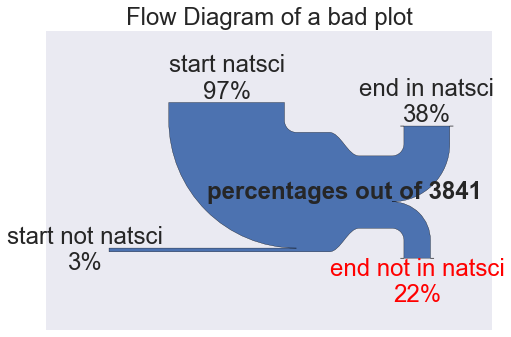

In [86]:
#16.	This cell makes a horrible flow diagram that does not look good and is not useful to us.
from matplotlib.sankey import Sankey
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Flow Diagram of a bad plot")
sankey = Sankey(ax=ax, scale=.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[ 100*Y_init/T,100*N_init/T, -100*Y_end/T1, -100*N_end/T1],
           labels=[ 'start natsci','start not natsci', 'end in natsci', 
                   'end not in natsci'],
           orientations=[ 1,0, 1, -1],
           pathlengths=[.25,.5, 0.25, 0.25
                        ],
           patchlabel="percentages out of 3841")  # Arguments to matplotlib.patches.PathPatch()
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')


#does not show specific pathways which is a bummer.

In [26]:
#17.	This cell returns two lists of transfer students who might start in natsci and transfer students who might grad in natsci
transfer_init_natsci=[]
transfer_end_natsci=[]
for i,j,k in zip(transfer,init_natsci,grad_natsci):
    if i=="Y":
        transfer_init_natsci.append(j)
        transfer_end_natsci.append(k)
my_list=[transfer_init_natsci,
transfer_end_natsci]

In [67]:
#18.	This cell calculates the number of students who transferred and start in\out nat sci and grad in/out natsci.
Y_init=0
N_init=0
Y_end=0
N_end=0
init_other=0
end_other=0
for i in transfer_init_natsci:
    if i=='Y':
        Y_init+=1
    elif i=='N':
        N_init+=1
    else:
        init_other+=1
for i in transfer_end_natsci:
    if i=='Y':
        Y_end+=1
    elif i=='N':
        N_end+=1        
    else:
        end_other+=1
T=Y_init+N_init+init_other
T1=Y_end+N_end+end_other

In [88]:
#19.	This cell calculates the number of students who start and end in natsci, start and do not end in natsci, Do not start but do end in natsci, and do not start and do not end in natcsi.
YY=0
YN=0
NY=0
NN=0
for i,j in zip(transfer_init_natsci,transfer_end_natsci):
    if i=="Y" and j=="Y":
        YY+=1
    if i=="Y" and j=="N":
        YN+=1
    if i=="N" and j=="Y":
        NY+=1
    if i=="N" and j=="N":
        NN+=1
print(YY,YN,NY,NN)

1354 853 120 0


The rest of the cells in this notebook were used to calculate alluvial diagram stuff. they have no useful information.

In [53]:
new_stem=[]
for i in stem_majors:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_stem.append(i)

new_non_stem=[]
for i in nonstem_majors:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_non_stem.append(i)

new_engineering=[]
for i in Engineering:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_engineering.append(i)

new_phy_ast=[]
for i in phy_ast:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_phy_ast.append(i)
    
new_education=[]
for i in education:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_education.append(i)

new_other=[]
for i in other:
    g = list(i)
    g.pop(0)
    g.pop(-1)
    i = "".join(g)
    new_other.append(i)

In [65]:
major= []
for row in data1.values[:,2]:
    major.append(row)
degree_conferred = []
for row in data1.values[:,8]:
    degree_conferred.append(row)
ID=[]
for row in data1.values[:,0]:
    ID.append(row)
start_term=[]
for row in data1.values[:,4]:
    start_term.append(row)
start_term_code=[]
for row in data1.values[:,5]:
    start_term_code.append(row)
end_term_code=[]
for row in data1.values[:,7]:
    end_term_code.append(row)

In [78]:
grad_list=[]
for i,j in zip(ID,degree_conferred):
    if j=="Y":
        grad_list.append(i)
grad_list

['00012B8A-396B-4C81-9EC8-C0706F710813',
 '00024047-3BDE-498F-BB96-3221E13843C4',
 '0006A7D8-694E-48A2-94BC-67022739E733',
 '000DB5E5-8B30-4EA2-A636-203A08D1E746',
 '000DD609-D571-4405-942F-CE8297D7D2F7',
 '001B04AC-A540-43E1-9E4D-9C4E23BF5FE8',
 '0024BF97-48D1-442D-8EEA-DDB5BA73AC32',
 '00290FE0-291D-42A7-9522-0D2B3ECE6B7C',
 '002F35BD-B8DE-4512-83EB-AD153DC19B8B',
 '0037FAB0-E662-4473-854E-4BB9CA11A913',
 '003B4612-1CF1-4A95-9863-2EE028DEB57A',
 '0040547E-DF9E-47DD-9DF5-B2AF7D7DABAF',
 '005B4822-DB41-4E3A-B532-9D879F4F3AC7',
 '0075AFE0-A544-4B79-987F-C60CDC72DB0D',
 '007B5E4C-88C9-4B0A-BF27-D482AB64692A',
 '0081AE51-F519-4759-9D3A-6CF134D0849D',
 '00847D8E-1A1D-4B8B-B65F-6E2A607BCFF8',
 '008644A6-5D37-4CBB-80C2-22BDA0B1E088',
 '0086FCFE-4DC9-44B4-A998-BEA221E35B83',
 '008A9CCF-0020-4258-AEB7-E83E84862A45',
 '0093C223-1D63-4AF0-96E1-3BE180CDBB37',
 '0093FD16-9D08-4601-B12C-6BB466EC2A3A',
 '009517E6-6F66-4CC4-BBA1-A69FA27C0FD4',
 '00978C61-1DE3-47D0-926F-C8FC836E3CB6',
 '00996408-A49C-

In [79]:
mark=4000
start_major=[]
end_major=[]
start_term=[]
end_term=[]
for a in grad_list:
    counter=0
    for i,j,k,l,m in zip(ID,start_term,major,start_term_code,end_term_code):
        
        if i!=a:
            counter+=1
        if i==a:
            if counter<=(len(ID)-2):
                
                if counter-1>=0:
                    
                    if i != ID[counter+1] and i != ID[counter-1]:
                        start_major.append(k)
                        start_term.append(l)
                        mark=4000
                
                if i != ID[counter+1]:
                    end_major.append(k)
                    end_term.append(m)
                    mark=4000
                    counter+=1
                
                if i==ID[counter+1]:
                    if mark >j:
                        if j<start_term[counter+1]:
                            mark=j
                            start_major.append(k)
                            start_term.append(l)
                            counter+=1
                    if mark <j:
                        counter+=1
                
                    
                if counter-1<0:
                    counter+=1
                    
                
            if counter+1>len(ID)-1:
                #end_major.append(k)
                counter+=1

print(len(start_major),len(end_major),len(start_term),len(end_term))
                        
            

0 0 0 0


In [69]:
len(start_major)

0

In [44]:
len(end_major)

10890

In [45]:
end_major.append(major[-1])

In [48]:
start_major[-1]

'Premedical'

In [47]:
len(end_major)

10891

In [50]:
start_stemm=0
start_stemo=0
start_stem=0
start_nonstem=0
start_engineering=0
start_physast=0
start_education=0
start_other=0

end_stemm=0
end_stemo=0
end_stem=0
end_nonstem=0
end_engineering=0
end_physast=0
end_education=0
end_other=0

In [72]:
for i in start_major:
    for j in new_stem:
        if i==j:
            start_stem+=1

for i in start_major:
    for j in new_non_stem:
        if i==j:
            start_nonstem+=1

for i in start_major:
    for j in new_engineering:
        if i==j:
            start_engineering+=1
            
for i in start_major:
    for j in new_phy_ast:
        if i==j:
            start_physast+=1
            
for i in start_major:
    for j in new_education:
        if i==j:
            start_education+=1
            
            
for i in start_major:
    for j in new_other:
        if i==j:
            start_other+=1
            
            

In [73]:
for i in end_major:
    for j in new_stem:
        if i==j:
            end_stem+=1

for i in end_major:
    for j in new_non_stem:
        if i==j:
            end_nonstem+=1

for i in end_major:
    for j in new_engineering:
        if i==j:
            end_engineering+=1
            
for i in end_major:
    for j in new_phy_ast:
        if i==j:
            end_physast+=1
            
for i in end_major:
    for j in new_education:
        if i==j:
            end_education+=1
            
            
for i in end_major:
    for j in new_other:
        if i==j:
            end_other+=1
            

In [74]:
print(start_stemm,
start_stemo,
start_stem,
start_nonstem,
start_engineering,
start_physast,
start_education,
start_other,

end_stemm,
end_stemo,
end_stem,
end_nonstem,
end_engineering,
end_physast,
end_education,
end_other)

0 0 7567 276 149 393 19 0 0 0 8275 1333 533 268 82 0
